# About Author:
- Project: Gufhtugu Publications Dataset Challenge
- Author: Mohsin Shareef
- Code Submission Date: March 2024
- Author Email: mohsinshareef822@gmail.com
- Author Github: https://github.com/MohsinShareef 

## About Data
### Context:
- This is the one of its kinds book sales dataset from Pakistan. It contains 20,000 book orders from January 2019 to January 2021.
- The data was collected from the merchant (Gufhtugu Publications www.Gufhtugu.com) who are partner in this research study.
- There is a dire need for such dataset to learn about Pakistan’s emerging e-commerce potential and I hope this will help many startups in many ways.
    
### Content:
- Geography: Pakistan
    
- Time period: 01/2019 – 01/2021

- Unit of analysis: E-Commerce Orders

- Collected By: ZEESHAN-UL-HASSAN USMANI
    
### Objectives:
- We intend to conduct an Exploratory Data Analysis (EDA) on the given dataset.
- The EDA will serve as the basis for the necessary Data Wrangling activities to be carried out for the purposes of data cleaning and normalization.
- During the coding process, we will document our observations. Ultimately, we will produce a summary and draw conclusions from our findings.
- The primary aim of this project is to conduct a thorough analysis of the dataset to identify significant insights.
   
## Kernel Version Used:
- Python 3.11.5
    
## Important Libraries:
- Import Following libraries:
1. Pandas: Data manipulation and analysis library.
2. Numpy: Numerical computing library.
3. Matplotlib: Data visualization library.
4. Seaborn: Statistical data visualization library.

In [1]:

# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Data Loading, Exploration & Wrangling
- Load the csv file with the pandas.
- Create DataFrame and understand the dataset.
- Dealing with missing values, anomalies, incorrect records.

In [2]:
# Load dataset
df = pd.read_csv('./data/Gufhtugu.csv', encoding='latin-1')

# Load dataset online
# df = pd.read_csv('/kaggle/input/gufhtugu-publications-dataset-challenge/GP Orders - 5.csv')

### Get a sneak peek of data
- Quick view the top 5 rows of dataset and make sense how start working

In [3]:
# Display first 5 rows
df.head()

,ï»¿Order Number,Order Status,Book Name,Order Date & Time,City,Payment Method,Total items,Total weight (grams)
0,307,Completed,Bitcoin Blockchain aur Crypto Currency - FREE ...,10/3/2019 15:03,faisalabad,NaN,2,200.0
1,308,Completed,Kaggle for Begginers,10/3/2019 15:54,Rawalpindi,Cash on Delivery (COD),1,200.0
2,309,Completed,Kaggle for Begginers/Bitcoin Blockchain aur Cr...,10/3/2019 16:09,Hyderabad,Cash on Delivery (COD),2,200.0
3,310,Cancelled,Kaggle for Begginers,10/3/2019 16:42,Rawalpindi,Cash on Delivery (COD),1,200.0
4,311,Completed,Bit Coin Block Chain aur Crypto Currency Ø¨Ù¹ ...,10/3/2019 16:44,Karachi,Cash on Delivery (COD),1,200.0


In [4]:
# Get the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ï»¿Order Number       19239 non-null  int64  
 1   Order Status          19239 non-null  object 
 2   Book Name             19237 non-null  object 
 3   Order Date & Time     19239 non-null  object 
 4   City                  19238 non-null  object 
 5   Payment Method        19229 non-null  object 
 6   Total items           19239 non-null  int64  
 7   Total weight (grams)  19239 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 1.2+ MB


In [5]:
# Get the columns names
df.columns

Index(['ï»¿Order Number', 'Order Status', 'Book Name', 'Order Date & Time',
       'City', 'Payment Method', 'Total items', 'Total weight (grams)'],
      dtype='object')

In [6]:
# Get the shape
df.shape

(19239, 8)

In [7]:
# Get the statistical summary
df.describe()

,ï»¿Order Number,Total items,Total weight (grams)
count,19239.000000,19239.000000,19239.000000
mean,52535.780238,6.051874,363.749675
std,15835.761148,576.938452,834.097325
min,307.000000,0.000000,200.000000
25%,48064.500000,1.000000,200.000000
50%,56436.000000,1.000000,200.000000
75%,63779.500000,1.000000,500.000000
max,71420.000000,80022.000000,55000.000000


### Observation Set 1:
- The Dataset have 19239 rows/entries.
- The Dataset have 8 columns/attributes.
- Columns/attributes name is:
    - 'ï»¿Order Number', 'Order Status', 'Book Name', 'Order Date & Time',
    -  'City', 'Payment Method', 'Total items', 'Total weight (grams)'.
- Rename the first column/attritube name.
- The data set have 3 numercal data type columns/attributes.
- The data set have 5 object data type columns/attributes.
- 75% order have contain 1 item.
- mx value `Total items` 80022 this is huge order.
- 50% order have contain 200 grams weight.
- max value `Total weight (grams)` 55000 grams.

- Rename the column

In [8]:
# Rename the column
df.rename(columns={'ï»¿Order Number':'Order Number'}, inplace=True)

In [9]:
# Display the columns
df.columns

Index(['Order Number', 'Order Status', 'Book Name', 'Order Date & Time',
       'City', 'Payment Method', 'Total items', 'Total weight (grams)'],
      dtype='object')

### Deal with Missing values

In [10]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False)

Payment Method          10
Book Name                2
City                     1
Order Number             0
Order Status             0
Order Date & Time        0
Total items              0
Total weight (grams)     0
dtype: int64

In [11]:
# Percentage of missing values
df.isnull().sum() / len(df) * 100

Order Number            0.000000
Order Status            0.000000
Book Name               0.010396
Order Date & Time       0.000000
City                    0.005198
Payment Method          0.051978
Total items             0.000000
Total weight (grams)    0.000000
dtype: float64

In [12]:
# Fill the missing values
df['City'].fillna(df['City'].mode()[0], inplace=True)
df['Payment Method'].fillna(df['Payment Method'].mode()[0], inplace=True)
df['Book Name'].fillna(df['Book Name'].mode()[0], inplace=True)

In [13]:
df.isnull().sum()

Order Number            0
Order Status            0
Book Name               0
Order Date & Time       0
City                    0
Payment Method          0
Total items             0
Total weight (grams)    0
dtype: int64

### Deal with Duplicate values

In [14]:
# Check the duplicate values
df.duplicated().sum()

0

In [15]:
# Check the Order Number duplicate value
df['Order Number'].duplicated().sum()

0

### Explore the numeric columns

In [16]:
df.describe()

,Order Number,Total items,Total weight (grams)
count,19239.000000,19239.000000,19239.000000
mean,52535.780238,6.051874,363.749675
std,15835.761148,576.938452,834.097325
min,307.000000,0.000000,200.000000
25%,48064.500000,1.000000,200.000000
50%,56436.000000,1.000000,200.000000
75%,63779.500000,1.000000,500.000000
max,71420.000000,80022.000000,55000.000000


### Deal with the Outliers 

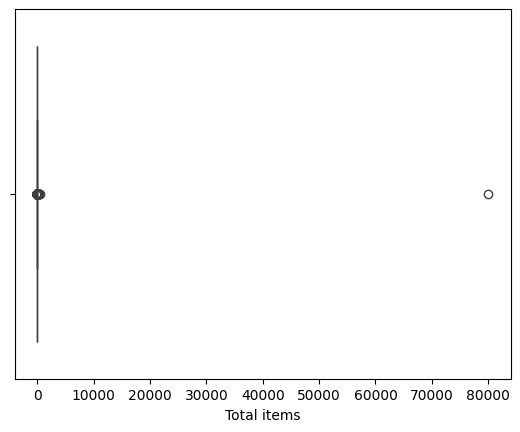

In [17]:
# Check the outlier in total items
sns.boxplot(x=df['Total items'])
plt.show()

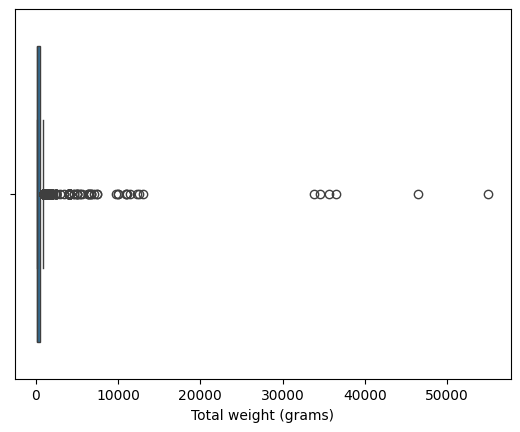

In [18]:
# Check the outlier in total weight
sns.boxplot(x=df['Total weight (grams)'])
plt.show()

In [19]:
# Check the outlier in total items
df[df['Total items']== 80022]

,Order Number,Order Status,Book Name,Order Date & Time,City,Payment Method,Total items,Total weight (grams)
15981,66499,Returned,Ø§ÙÙ¹Ø±ÙÛÙ¹ Ø³Û Ù¾ÛØ³Û Ú©Ù Ø§Ø¦ÛÚº,12/27/2020 1:37,City,EasyPaisa,80022,200.0


In [20]:
# Check the outlier in total weight
df[df['Total weight (grams)']== 55000]

,Order Number,Order Status,Book Name,Order Date & Time,City,Payment Method,Total items,Total weight (grams)
8737,55170,Returned,"Blockchain, Cryptocurrency And Bitcoin",9/18/2020 10:55,Hub city,EasyPaisa,101,55000.0


## Both of case in outlier order are returned may be order place mistake

In [21]:
df['Total items'].value_counts()

Total items
1        14748
2         1663
3          857
4          553
5          431
6          286
7          172
8          117
9           91
10          64
11          53
12          48
14          23
13          19
16          16
15          14
17           9
20           9
22           7
18           7
19           5
21           4
106          3
23           3
55           3
26           3
56           2
0            2
39           2
29           2
32           2
31           2
80022        1
66           1
150          1
280          1
24           1
440          1
100          1
35           1
25           1
369          1
41           1
40           1
194          1
101          1
27           1
93           1
50           1
30           1
28           1
Name: count, dtype: int64

In [22]:
df['Total weight (grams)'].value_counts()

Total weight (grams)
200.0      11782
500.0       4473
400.0       1359
600.0        780
1000.0       360
401.0        158
440.0         70
1500.0        60
4000.0        53
800.0         31
2000.0        16
1200.0        12
4200.0         9
1001.0         7
2500.0         6
5000.0         4
900.0          3
1001.5         2
6500.0         2
1450.0         2
7500.0         2
430.0          2
5400.0         2
6700.0         2
10000.0        2
1800.0         2
6400.0         2
34500.0        1
35600.0        1
36500.0        1
7100.0         1
33800.0        1
4590.0         1
980.0          1
4670.0         1
1190.0         1
1700.0         1
5600.0         1
11100.0        1
10980.0        1
13000.0        1
6720.0         1
2150.0         1
55000.0        1
550.0          1
11000.0        1
3000.0         1
601.0          1
450.0          1
12300.0        1
801.0          1
9800.0         1
46500.0        1
1100.0         1
3450.0         1
11500.0        1
1990.0         1
990.0     

### Explore the object columns
- Check the Payment Method columns

In [23]:
# Check the unique values of Payment Method
df['Payment Method'].unique()

array(['Cash on delivery', 'Cash on Delivery (COD)', 'EasyPaisa',
       'JazzCash', 'BankTransfer'], dtype=object)

In [24]:
# Change the value
df['Payment Method'] = df['Payment Method'].str.replace('Cash on Delivery (COD)', 'Cash on delivery')

In [25]:
df['Payment Method'].unique()

array(['Cash on delivery', 'EasyPaisa', 'JazzCash', 'BankTransfer'],
      dtype=object)

- Check the Order Status

In [26]:
# Check the unique values of Order Status
df['Order Status'].unique()

array(['Completed', 'Cancelled', 'Returned'], dtype=object)

- Check the Book Name column

In [27]:
df['Book Name'].unique()

array(['Bitcoin Blockchain aur Crypto Currency - FREE E-Book',
       'Kaggle for Begginers',
       'Kaggle for Begginers/Bitcoin Blockchain aur Crypto Currency - FREE E-Book',
       ...,
       'Blockchain, Cryptocurrency And Bitcoin/Column Nigari Kese Sekhain',
       'Ù\x85Ø´Û\x8cÙ\x86 Ù\x84Ø±Ù\x86Ù\x86Ú¯/Ú\x88Û\x8cÙ¹Ø§ Ø³Ø§Ø¦Ù\x86Ø³/Artificial Intelligence/Blockchain, Cryptocurrency And Bitcoin/Python Programming/Ø§Ù\x86Ù¹Ø±Ù\x86Û\x8cÙ¹ Ø³Û\x92 Ù¾Û\x8cØ³Û\x81 Ú©Ù\x85Ø§Ø¦Û\x8cÚº/R ka Taaruf/Introduction to Blockchain with Case Studies/Linux - An Introduction/Kaggle for Begginers',
       'Linux - An Introduction/Python Programming/Kaggle for Begginers/Artificial Intelligence/Ø§Û\x8cÚ© ØªÚ¾Ø§ Ø§Ù\x84Ú¯Ù\x88Ø±ØªÚ¾Ù\x85/R ka Taaruf/Ù\x85Ø´Û\x8cÙ\x86 Ù\x84Ø±Ù\x86Ù\x86Ú¯'],
      dtype=object)

In [28]:
df['Book Name'].nunique()

3525

- Check the Order Data & Time column

In [29]:
df['Order Date & Time'].dtype

dtype('O')

In [30]:
# Convert date column to datetime object
df['Order Date & Time'] = pd.to_datetime(df['Order Date & Time'])

In [31]:
# Separating year, month and day column
df["order_year"] = df['Order Date & Time'].dt.strftime('%Y')
df["order_month"] = df["Order Date & Time"].dt.strftime("%B")
df["order_day"] = df["Order Date & Time"].dt.strftime("%a")

- Check the City column

In [32]:
df['City'].unique()

array(['faisalabad', 'Rawalpindi', 'Hyderabad', ...,
       'tehsil Bhalwal District Sargodha', 'Clifton / Karachi',
       'Mailsi, district Vehari'], dtype=object)

In [33]:
df['City'].nunique()

4163

In [34]:
df['City'].value_counts()

City
Karachi                                                                                                                                                                              2333
Lahore                                                                                                                                                                               1993
Islamabad                                                                                                                                                                             859
Rawalpindi                                                                                                                                                                            645
Faisalabad                                                                                                                                                                            478
Peshawar                                                         

In [35]:
# Best selling books
best_selling_books = df.groupby('Book Name')['Total items'].sum().sort_values(ascending=False).head()
# Reset the index and rename the columns
best_selling_books = best_selling_books.to_frame().reset_index().rename(columns={'Book Name': 'Book Name', 'Total items': 'Total items'})
best_selling_books

,Book Name,Total items
0,Ø§ÙÙ¹Ø±ÙÛÙ¹ Ø³Û Ù¾ÛØ³Û Ú©Ù Ø§Ø¦ÛÚº,83532
1,Python Programming,1594
2,"Blockchain, Cryptocurrency And Bitcoin",1473
3,Product Management,1084
4,Artificial Intelligence,932


In [36]:
# make plot use plotly best_selling_books
fig = px.bar(best_selling_books, x='Book Name', y='Total items', title='Best Selling Books')
fig.show()

### Find the Best Payment Method

In [37]:
best_method = df['Payment Method'].value_counts()
best_method = best_method.to_frame().reset_index().rename(columns={'index': 'Payment Method', 'Payment Method': 'Payment Method'})
best_method

,Payment Method,count
0,Cash on delivery,17487
1,EasyPaisa,697
2,JazzCash,596
3,BankTransfer,459


In [38]:
# Make plot use plotly best_method
fig = px.bar(best_method, x='Payment Method', y='count', title='Best Payment Method')
fig.show()

In [39]:
df['Order Status'].value_counts()

Order Status
Completed    17948
Returned      1142
Cancelled      149
Name: count, dtype: int64

In [40]:
Order_Status = df['Order Status'].value_counts()
Order_Status = Order_Status.to_frame().reset_index().rename(columns={'index': 'Order Status', 'Order Status': 'Order Status'})
Order_Status

,Order Status,count
0,Completed,17948
1,Returned,1142
2,Cancelled,149


In [41]:
fig = px.bar(Order_Status, x='Order Status', y='count', title='Order Status')
fig.show()

### which day higher sales

In [42]:
day_sales = df.groupby('order_day')['Total items'].sum().reset_index().sort_values(by='Total items', ascending=True)
day_sales

,order_day,Total items
5,Tue,3328
6,Wed,4010
4,Thu,4191
1,Mon,4805
0,Fri,5059
2,Sat,7683
3,Sun,87356


### Which month higher sales

In [43]:
month_sales = df.groupby('order_month')['Total items'].sum().reset_index().sort_values(by='Total items', ascending=True)
month_sales

,order_month,Total items
3,February,97
7,March,137
0,April,215
8,May,1839
5,July,2148
6,June,2157
11,September,2565
10,October,3311
1,August,3809
9,November,5068


### Which year higher sale

In [44]:
year_sales = df.groupby('order_year')['Total items'].sum().reset_index().sort_values(by='Total items', ascending=True)
year_sales

,order_year,Total items
0,2019,618
2,2021,7566
1,2020,108248


In [45]:
# make pie chart use plotly
fig = px.pie(year_sales, values='Total items', names='order_year', title='Yearly Sales')
fig.show()

# Top 5 cities from recive orders

In [46]:
df['City'].isnull().sum()

0

In [47]:
top_city = df.groupby('City')['Total items'].sum().sort_values(ascending=False).head()
top_city = top_city.to_frame().reset_index()
top_city

,City,Total items
0,City,80050
1,Karachi,4736
2,Lahore,4221
3,Islamabad,2325
4,Rawalpindi,1150


In [48]:
# make plot use plotly top_city
fig = px.bar(top_city, x='City', y='Total items', title='Top City')
fig.show()

# Summary
- Most Sale book is Ø§ÙÙ¹Ø±ÙÛÙ¹ Ø³Û Ù¾ÛØ³Û Ú©ÙØ§Ø¦ÛÚº
- Payment method are use in most of the orders is 'Cash on delivery'
- Most of the order deliver safely 
- Most book orders come on sunday
- Number 1 most of the order from randam cities
- number 2  most of the order from karachi city
- In 2019 order receive 618
- In 2020 order receive 108248
- In 2021 order receive 7566